CAMINHO DOS DADOS

https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
covid = pd.read_csv('https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv')

In [ ]:
covid.head()

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00047,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00047,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Criando uma variável mortes, agrupando por state e somando somente as mortes**

In [ ]:
mortes = covid.groupby('state').sum()['deaths'].reset_index()

In [ ]:
mortes.tail()

,state,deaths
23,SC,2776054
24,SE,1162603
25,SP,23759837
26,TO,604765
27,TOTAL,98543297


In [ ]:
mortes.rename(columns={'state':'Estado', 'deaths':'Total de Mortes'},inplace=True)

In [ ]:
mortes.head()

,Estado,Total de Mortes
0,AC,390890
1,AL,1170817
2,AM,3120629
3,AP,422738
4,BA,4481490


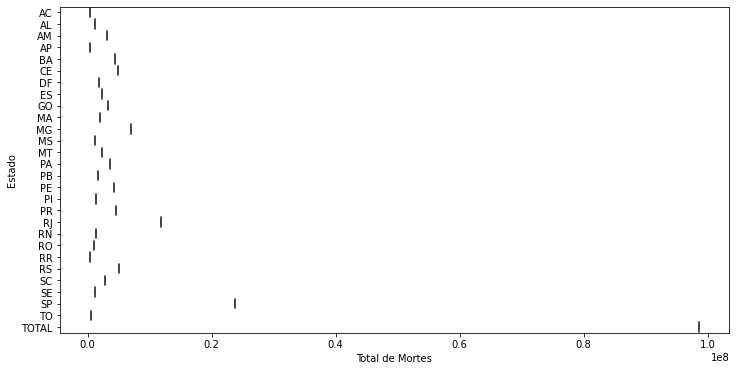

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Total de Mortes', y='Estado', data=mortes)

**Processo de limpeza dos dados. Dropando as colunas que estão com muitas informações nulas.**

In [ ]:
del covid['vaccinated_per_100_inhabitants']

**Analisando as colunas que estão com informações nulas**

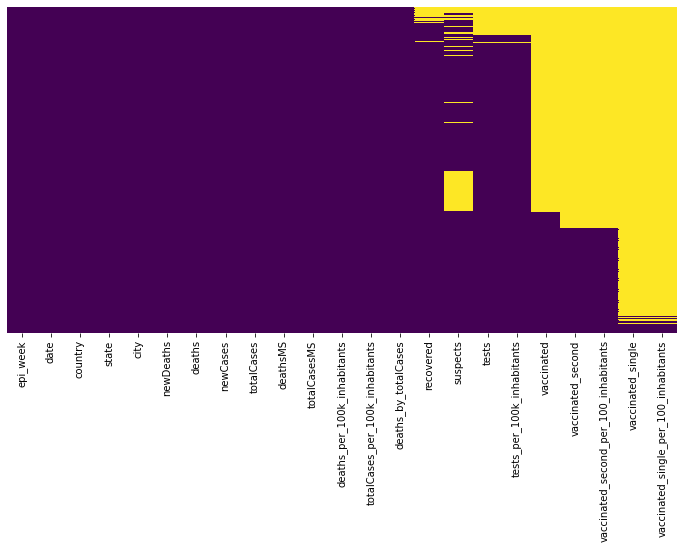

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(covid.isnull(), yticklabels=False, cbar=False, cmap='viridis')

**Criando a variável new_cases e recebendo da variável covid, o estado e a coluna new cases**

In [ ]:
new_cases = covid[{'state','newCases'}]

In [ ]:
new_cases.tail()

,state,newCases
13841,SC,764
13842,SE,177
13843,SP,3144
13844,TO,0
13845,TOTAL,15806


In [ ]:
covid['state'].value_counts().head(5)

TOTAL    511
SP       511
RJ       502
ES       501
BA       501
Name: state, dtype: int64

In [ ]:
new_cases.head(10)

,state,newCases
0,SP,1
1,TOTAL,1
2,SP,0
3,TOTAL,0
4,SP,0
5,TOTAL,0
6,SP,1
7,TOTAL,1
8,SP,0
9,TOTAL,0


In [ ]:
new_cases.groupby('newCases').count()

,state
newCases,
-1582,1
-850,1
-649,1
-290,1
-211,1
...,...
91244,1
95444,1
96278,1


**Dando um value_counts da coluna newDeaths e um head com os 5 primeiros**

In [ ]:
covid['newDeaths'].value_counts().head(5)

0    1254
1     535
5     460
4     436
3     432
Name: newDeaths, dtype: int64

**Dando um value_counts da coluna state e um head com os 5 primeiros**

In [ ]:
covid['state'].value_counts().tail()

RO    487
MA    487
MT    487
AP    487
RR    486
Name: state, dtype: int64

**Pegando o primeiro valor**

In [ ]:
covid['state'].iloc[0]

'SP'